<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Decision Trees & Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Tree models
Let's start with a simple example to understand how the depth of the tree impacts overfitting/underfitting.

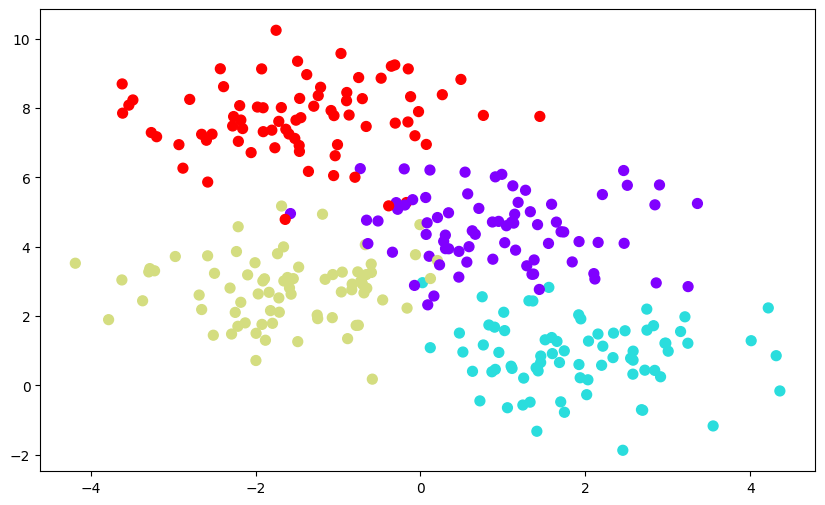

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [3]:
def plot_decision_boundaries(X,y,model):
    
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    markers = ['^','s','v','o','x']
    colors = ['yellow','green','purple','blue','orange']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for i,k in enumerate(np.unique(y)):
        plt.scatter(X.loc[y==k].iloc[:,0],X.loc[y==k].iloc[:,1],
                    c=colors[i],marker=markers[i],label=k,edgecolor='black')

    xgrid = np.arange(X.iloc[:,0].min(),X.iloc[:,0].max(),
                      (X.iloc[:,0].max()-X.iloc[:,0].min())/500)
    ygrid = np.arange(X.iloc[:,1].min(),X.iloc[:,1].max(),
                      (X.iloc[:,1].max()-X.iloc[:,1].min())/500)
    xx,yy = np.meshgrid(xgrid,ygrid)
    
    mesh_preds = model.predict(np.c_[xx.ravel(),yy.ravel()])
    mesh_preds = mesh_preds.reshape(xx.shape)
    plt.contourf(xx,yy,mesh_preds,alpha=0.2,cmap=cmap)
    plt.legend()
    return

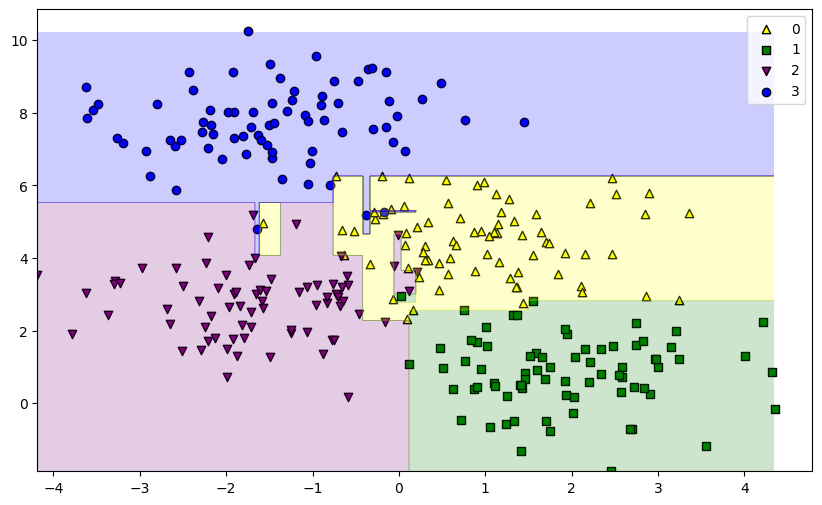

In [4]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

As we can see above, our model appears to be overfitting the data. Let's run again using a fixed value for max_depth and look at the resulting decision boundaries

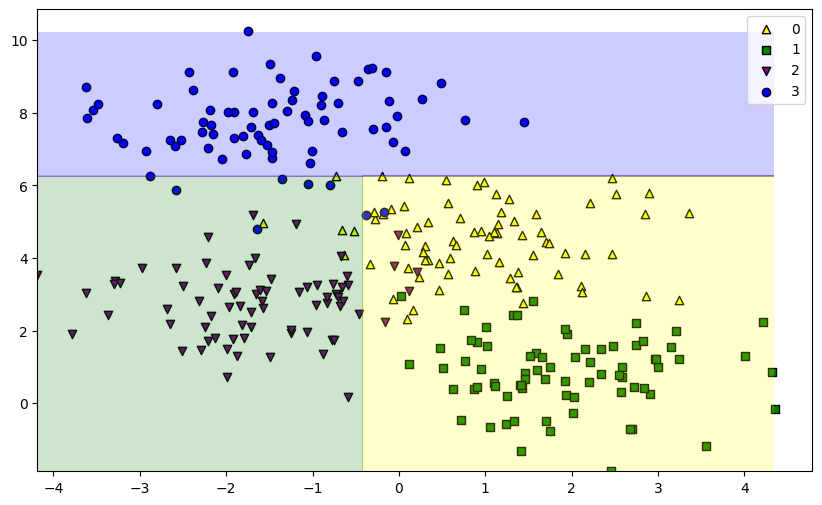

In [5]:
# Instantiate the decision tree model using max_depth=2
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

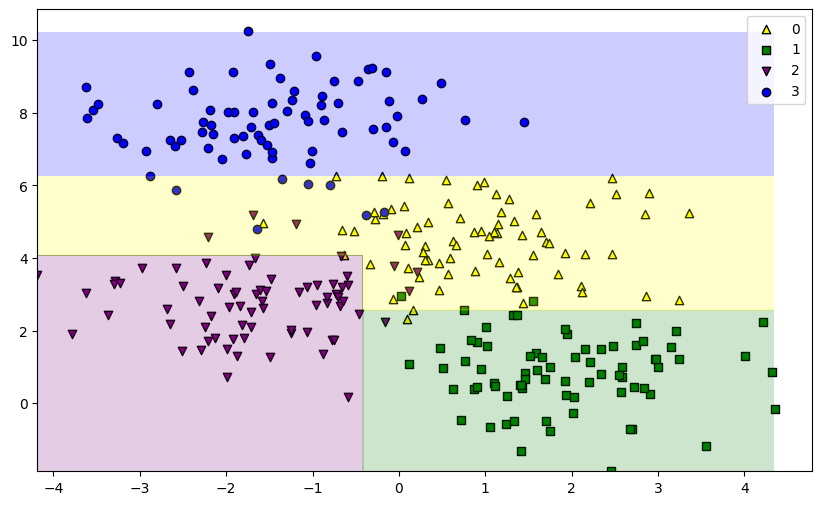

In [6]:
# Instantiate the decision tree model using max_depth=3
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

We can see that as we change max_depth, we get a simpler or more complex model.  We can tune this as we do with any hyperparameter and find the optimal value

### Visualizing a decision tree

In [7]:
# Load the dataset using a helper function in Seaborn
iris = sns.load_dataset('iris')

# Create feature matrix
X = iris.drop(labels='species',axis=1)

# Create target vector
y = iris['species']

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

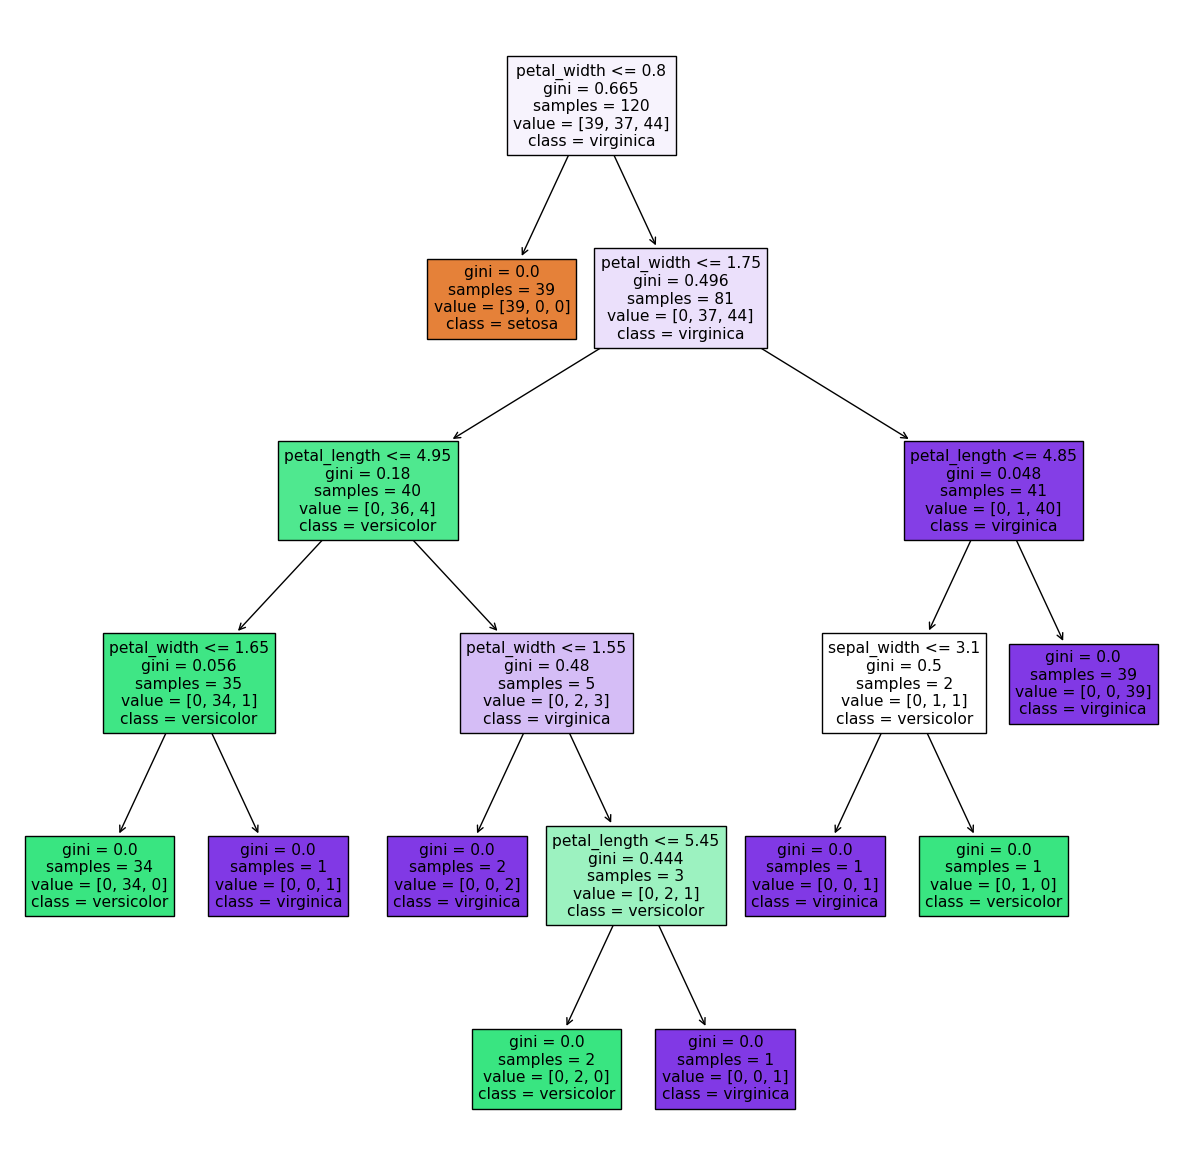

In [11]:
# Visualize the decision tree
plt.figure(figsize=(15,15))
plot_tree(tree_model,feature_names=list(X.columns),class_names=list(y.unique()),filled=True)
plt.show()

In [12]:
# Calculate the accuracy on the test set
test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 1.000


Let's run one more and we will limit the min_samples_leaf to reduce the possibility of overfitting

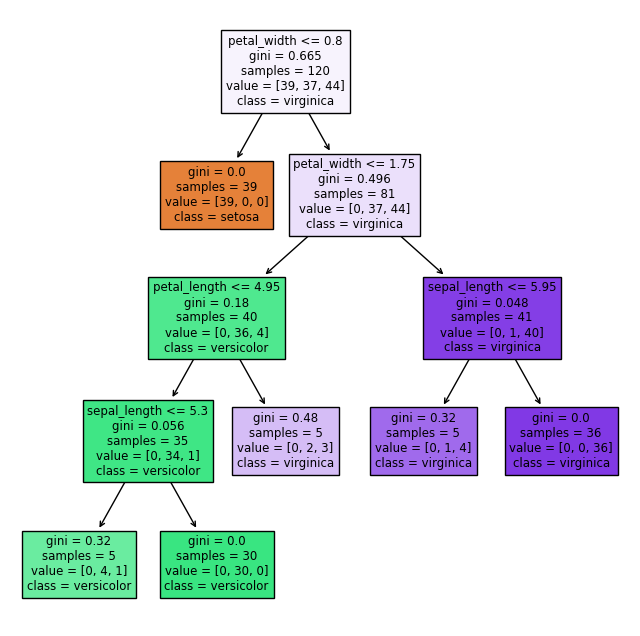

In [13]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=5,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(8,8))
plot_tree(tree_model,feature_names=list(X.columns),class_names=list(y.unique()),filled=True)
plt.show()

In [14]:
# Calculate the accuracy on the test set
test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 1.000


# Random Forests

In [15]:
# Load the data
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.4)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.5372,0.23880,0.2768,0.07615
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.10890,0.15820,0.1050,0.08586,0.2346,0.08025


Let's start with a decision tree model with no limitation on depth

In [22]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.895


Now we'll try a random forest model, and use the default settings from scikit learn

In [23]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                  max_samples=None,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.934


Include all features in every tree that we grow, but reduce the number of training rows to 0.7

In [21]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=1000,
                                 max_features=1.,max_samples=0.7,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.934


Simplify the trees by setting min_samples_leaf=5 and reducing max_features to 0.1, but increase the number of trees to 1000

In [24]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=5,n_estimators=1000,
                                 max_features=0.1,max_samples=0.7,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.943


In this case, a larger number of simpler trees beats a smaller number of more complex trees (this is not always the case, but often!)

### Grid Search

To help us optimize our multiple hyperparameters, we will run a Grid Search to try multiple combinations of hyperparameters and see which combination gives us the best fit

In [25]:
# Set up and run a cross-validated grid search to find the best parameters

from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model,params,cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.1, 0.5, 1.0],
                         'max_samples': [0.5, None],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [100, 1000]})

In [26]:
# Display the best parameters
grid_search.best_params_

{'max_features': 0.1,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [27]:
# Run the model using the parameters found from the grid search
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                 max_features=0.1,max_samples=0.5,random_state=0)
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.952


### Random Forest feature importance

We can also use our Random Forest model to determine the relative importance of each feature.  The importance is calculated by looking at how much the tree nodes that use each feature reduce impurity on average (across the whole forest), weighted by number of samples at node

In [28]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return RF_ranking

,Feat Index,Feature,Importance
0,7,mean concave points,0.192515
1,22,worst perimeter,0.149941
2,27,worst concave points,0.127794
3,23,worst area,0.076652
4,6,mean concavity,0.065310
5,20,worst radius,0.043328
6,2,mean perimeter,0.041499
7,3,mean area,0.041425
8,0,mean radius,0.039706
9,13,area error,0.031345


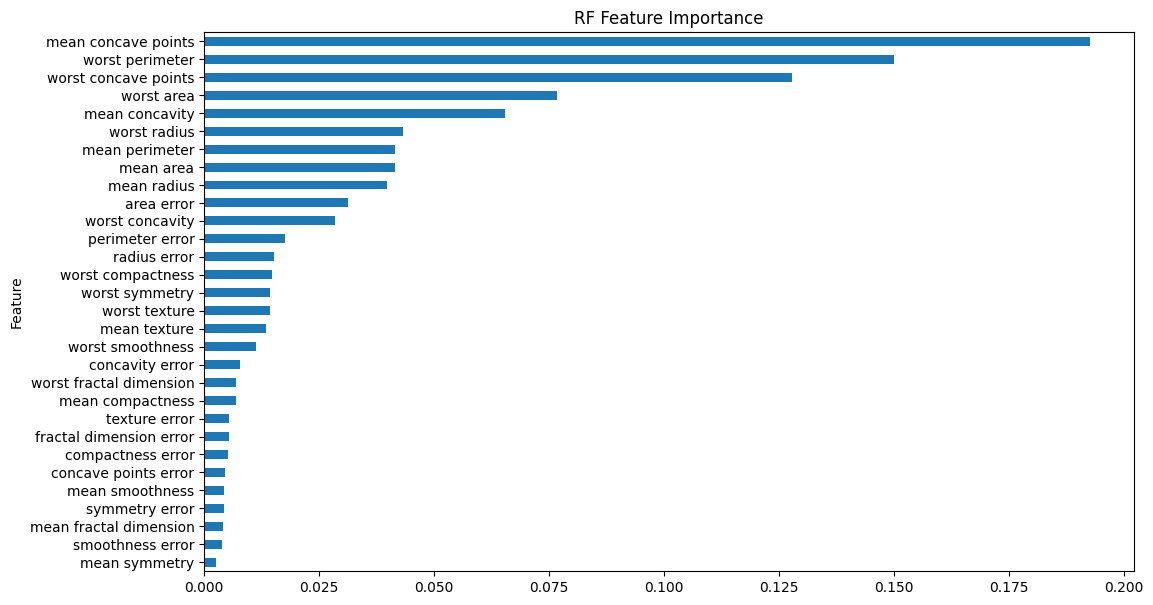

In [29]:
# Instantiate a random forest, fit it to the data and then run the function to calculate feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
top_feats = 30
ranking = calc_feature_importances(rf_model,X.columns,top_feats)